# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import time

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


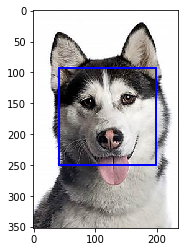

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(dog_files[31])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
For the first 100 pictures in each group, the face detector found 96% of human faces and found that 18% of dog images had faces, some of which were human faces and others were just dog faces misclassified as human faces. 

After trying multiple haarcascade classifiers from OpenCV, I conclude that the haarcascade_frontalface_alt.xml is the most accuracte classifier to find human faces and reject dog faces. 


In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

print("Checking human files...")
time.sleep(.25)

faces_detected = 0
human_files_without_faces = []

for i in tqdm(range(len(human_files_short))):
    if face_detector(human_files_short[i]):
        faces_detected += 1
    else:
        human_files_without_faces.append(i)
        
time.sleep(.25)

detection_ratio = faces_detected/len(human_files_short) * 100

print(f"Faces detected in human_files_short: {faces_detected} ({detection_ratio}%)")
print(f"Human files without detected faces: ", human_files_without_faces)


print()
print("Checking dog files...")
time.sleep(.25)

faces_detected = 0
dog_files_with_faces = []

for i in tqdm(range(len(dog_files_short))):
    if face_detector(dog_files_short[i]):
        dog_files_with_faces.append(i)
        faces_detected += 1
        
time.sleep(.25)

detection_ratio = faces_detected/len(dog_files_short) * 100

print(f"Faces detected in dog_files_short: {faces_detected} ({detection_ratio}%)")
print(f"Dog files with detected faces: ", dog_files_with_faces)

Checking human files...


100%|████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 30.12it/s]


Faces detected in human_files_short: 96 (96.0%)
Human files without detected faces:  [2, 27, 45, 52]

Checking dog files...


100%|████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


Faces detected in dog_files_short: 18 (18.0%)
Dog files with detected faces:  [15, 23, 28, 31, 37, 38, 39, 43, 58, 63, 67, 72, 76, 77, 80, 81, 86, 96]


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.
def evaluate_face_detector(xmlpath):
    # extract pre-trained face detector
    haar_cascade = cv2.CascadeClassifier(xmlpath)
    
    print(f"Evaluating haar cascade: {xmlpath}")
    print()
    
    print("Checking human files...")
    time.sleep(.25)

    faces_detected = 0
    human_files_without_faces = []

    for i in tqdm(range(len(human_files_short))):
        img = cv2.imread(human_files_short[i])
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = haar_cascade.detectMultiScale(gray)
        if len(faces) > 0:
            faces_detected += 1
        else:
            human_files_without_faces.append(i)

    time.sleep(.25)

    detection_ratio = faces_detected/len(human_files_short) * 100

    print(f"Faces detected in human_files_short: {faces_detected} ({detection_ratio}%)")
    print(f"Human files without detected faces: ", human_files_without_faces)


    print()
    print("Checking dog files...")
    time.sleep(.25)

    faces_detected = 0
    dog_files_with_faces = []

    for i in tqdm(range(len(dog_files_short))):
        img = cv2.imread(dog_files_short[i])
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = haar_cascade.detectMultiScale(gray)
        if len(faces) > 0:
            dog_files_with_faces.append(i)
            faces_detected += 1

    time.sleep(.25)

    detection_ratio = faces_detected/len(dog_files_short) * 100

    print(f"Faces detected in dog_files_short: {faces_detected} ({detection_ratio}%)")
    print(f"Dog files with detected faces: ", dog_files_with_faces)

In [7]:
evaluate_face_detector('haarcascades/haarcascade_frontalface_alt.xml')
#evaluate_face_detector('haarcascades/haarcascade_frontalface_alt2.xml')
#evaluate_face_detector('haarcascades/haarcascade_frontalface_alt_tree.xml')
#evaluate_face_detector('haarcascades/haarcascade_frontalface_default.xml')
#evaluate_face_detector('haarcascades/haarcascade_profileface.xml')

Evaluating haar cascade: haarcascades/haarcascade_frontalface_alt.xml

Checking human files...


100%|████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 57.03it/s]


Faces detected in human_files_short: 96 (96.0%)
Human files without detected faces:  [2, 27, 45, 52]

Checking dog files...


100%|████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.20it/s]


Faces detected in dog_files_short: 18 (18.0%)
Dog files with detected faces:  [15, 23, 28, 31, 37, 38, 39, 43, 58, 63, 67, 72, 76, 77, 80, 81, 86, 96]


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [58]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [59]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # resize the image to 3, 224, 224 with a Resize and CenterCrop then convert to Tensor
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                            [0.229, 0.224, 0.225])
    ])
    
    # open the PIL image and preprocess
    img = Image.open(img_path)
    input_img = preprocess(img)
    
    # VGG16 expects input to be 4D tensor of shape (batch_size, 3, 224, 224) with the first dimension being the batch size
    input_img = input_img.view(1, input_img.shape[0], input_img.shape[1], input_img.shape[2])
    
    # move the tensor to the GPU if using GPU
    if use_cuda:
        input_img = input_img.cuda()
    
    # pass the image tensor through the VGG16 network - output is (1, 1000) class probability
    output = VGG16(input_img)
    
    # topk method returns the highest class probability
    top_p, top_class = output.topk(1, dim=1)
    top_idx = top_class.squeeze().item()
    
    return top_idx # predicted class index

In [60]:
VGG16_predict('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

252

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [61]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    idx = VGG16_predict(img_path)
    
    return 151 <= idx <= 268 # true/false

In [12]:
dog_detector('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

True

img_path:  dogImages\test\011.Australian_cattle_dog\Australian_cattle_dog_00728.jpg
prediction:  273


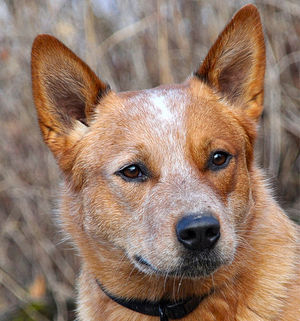

In [23]:
img_path = dog_files_short[74]
img = Image.open(img_path)
prediction = VGG16_predict(img_path)
print("img_path: ", img_path)
print("prediction: ", prediction)
img

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
The results for dog_files_short shows 93% detected dogs for the first 100 files.
The results for human_files_short shows 0% detected dogs for the first 100 files. 

In [24]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

print("Checking human files...")
time.sleep(.25)

dogs_detected = 0
human_files_with_dogs = []

for i in tqdm(range(len(human_files_short))):
    if dog_detector(human_files_short[i]):
        dogs_detected += 1
        human_files_with_dogs.append(i)
        
time.sleep(.25)

detection_ratio = dogs_detected/len(human_files_short) * 100

print(f"Dogs detected in human_files_short: {dogs_detected} ({detection_ratio}%)")
print(f"Human files with detected dogs: ", human_files_with_dogs)


print()
print("Checking dog files...")
time.sleep(.25)

dogs_detected = 0
dog_files_without_dogs = []

for i in tqdm(range(len(dog_files_short))):
    if dog_detector(dog_files_short[i]):
        dogs_detected += 1
    else:
        dog_files_without_dogs.append(i)
        
time.sleep(.25)

detection_ratio = dogs_detected/len(dog_files_short) * 100

print(f"Dogs detected in dog_files_short: {dogs_detected} ({detection_ratio}%)")
print(f"Dog files without detected dogs: ", dog_files_without_dogs)

Checking human files...


100%|████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.70it/s]


Dogs detected in human_files_short: 0 (0.0%)
Human files with detected dogs:  []

Checking dog files...


100%|████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 19.27it/s]


Dogs detected in dog_files_short: 93 (93.0%)
Dog files without detected dogs:  [24, 27, 44, 74, 77, 78, 80]


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [25]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.


In [57]:
# if GPU was used, clear training and test data from memory
if use_cuda:
    torch.cuda.empty_cache()

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [13]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_dir = 'dogImages'

# create transforms for the image data
train_transform = transforms.Compose([transforms.Resize(255),
                                      transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

test_transform = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

valid_transform = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

# Get the datasets
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transform)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transform)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=valid_transform)

# Get the dataloaders
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle = True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle = True)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=32, shuffle = True)


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: For the training data, I chose to do a random rotation, random crop, and random horizontal flip to allow the network to become more rotationally invariant and translationally invariant. For the test and validation transforms, I chose to just convert the image to the properly sized tensor without any random adjustments. I chose the size (3, 224, 224) with means of (0.485, 0.456, 0.406) and standard deviations of (0.229, 0.224, 0.225) for color channel normalization since this is how the ImageNet models were trained -- this is so that I can compare my model to an ImageNet model and make it easier for future transfer learning. 


In [207]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    plt.imshow(image)

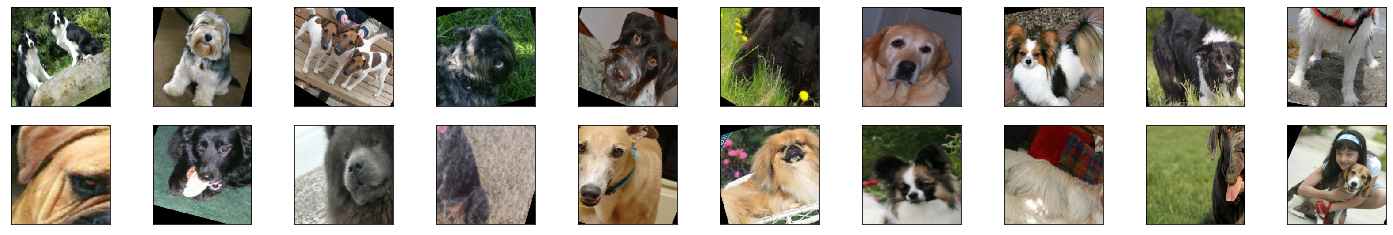

In [15]:
# obtain one batch of training images
dataiter = iter(train_dataloader)
images, labels = dataiter.next()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [16]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # convolutional layer (sees 224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 112x112x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 56x56x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer - size and stride of 2 cuts layer in half
        self.pool = nn.MaxPool2d(2, 2)
        # max pooling layer - size and stride of 7 cuts layer by 7 (28 -> 4)
        self.pool7 = nn.MaxPool2d(7, 7)
        # final conv+pool layer is 4x4x64 -> flattened
        # linear layer (1024 -> 500)
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        # linear layer (500 -> 133)
        self.fc2 = nn.Linear(500, 133)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x))) # 224 -> 112 dimensions;  3 -> 16 feature maps
        x = self.pool(F.relu(self.conv2(x))) # 112 -> 56  dimensions; 16 -> 32 feature maps
        x = self.pool(F.relu(self.conv3(x))) # 56  -> 28  dimensions; 32 -> 64 feature maps
        x = self.pool7(x)                    # 28  -> 4   dimensions; 64 -> 64 feature maps
        # flatten image
        x = x.view(-1, 64 * 4 * 4)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x
    

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [17]:
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool7): MaxPool2d(kernel_size=7, stride=7, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ After researching other methods of creating a CNN for dog breed classification, I decided to go with at least three convolution layers, progressively increasing the depth of the feature maps. Each convolution layer is activated by a ReLU function. Since the image was 224x224, I knew that I had to reduce the feature map dimensions significantly, otherwise it would take too long to process the training and I would likely have many useless feature detectors. I decided to use max pooling after each convolution layer to reduce the image by a factor of 2 in each dimension. A convolution layer with kernel size 3 and stride 1 and padding 1 results in a feature map of the same output dimensions as input dimensions. My first layer uses 16 filters to increase the depth from 3 to 16. My first pooling layer reduces the 224x224 image to a 112x112 feature map. My second convolution layer uses 32 filters to increase the depth from 16 to 32 and the second pooling layer reduces the feature map dimensions from 112x112 to 56x56. The third and final convolution layer uses 64 filters to increase the depth from 32 to 64 and the third pooling layer reduces the dimensions from 56x56 to 28x28. At this point, I still have 28x28x64 feature detectors which is a bit much to process on a single GPU, so I decided to add another maxpool at this point to reduce the dimensions once again from 28x28 to 4x4 -- to do this, I used a maxpool of size 7 and stride 7 to divide the dimension by 7 and produce the final 64 4x4 feature maps. I then flattened the feature maps into 1024 individual feature detectors in a vector which is the input to the dense network. In the fully connected network, I followed examples and other research for creating a fully connected MLP to go from 1024 inputs to 133 outputs using one hidden layer with size of 500 nodes. I implemented a droupout rate of 25% in the fully connected layers to prevent overfitting.  

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [18]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [19]:
# the following import is required for training to be robust to truncated images
from tqdm import tqdm
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in tqdm(enumerate(loaders['train'])):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            ## find the loss and update the model parameters accordingly
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss += loss.item()*data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in tqdm(enumerate(loaders['valid'])):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)

        # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
            
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model




In [20]:
# load the previously trained model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

# train the model
loaders_scratch = {'train': train_dataloader, 'test': test_dataloader, 'valid': valid_dataloader}

model_scratch = train(1, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

209it [08:17,  2.38s/it]
27it [00:53,  1.97s/it]

Epoch: 1 	Training Loss: 3.816419 	Validation Loss: 3.692151
Validation loss decreased (inf --> 3.692151).  Saving model ...


<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [25]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in tqdm(enumerate(loaders['test'])):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))



In [26]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

27it [00:12,  2.11it/s]

Test Loss: 3.659613


Test Accuracy: 13% (117/836)


In [27]:
# if GPU was used, clear model from memory
if use_cuda:
    del model_scratch
    torch.cuda.empty_cache()

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [28]:
## TODO: Specify data loaders
# using the same data loaders from before
loaders_transfer = {'train': train_dataloader, 'test': test_dataloader, 'valid': valid_dataloader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [29]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

# get the number of input features to the final fully connected layer
n_inputs = model_transfer.classifier[6].in_features

# add last linear layer (n_inputs -> 133 dog classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, 133)

model_transfer.classifier[6] = last_layer

# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I used the VGG16 pretrained model since it is already trained to classify the ImageNet classes which contains over 100 dog breeds. This means that the CNN is trained to identify features of similar interest to my dataset. Since the dog data set is not very large, I do not want to retrain the entire CNN with the dogImages -- therefore I will want to freeze the weights to the VGG16 model and only retrain a new fully connected layer at the end of the network. I stripped the 4096->1000 fully connected layer at the end which classifies pictures into the ImageNet classes and I replaced it with my own 4096->133 fully connected layer to classify images to the classes that I want. I will keep all the weights off the CNN and the first few fully connected layers frozen and I will just update weights in my last fully connected layer. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [30]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [31]:
# load the previously trained model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

# train the model
model_transfer = train(1, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

209it [04:06,  1.18s/it]
27it [00:26,  1.04it/s]


Epoch: 1 	Training Loss: 1.542058 	Validation Loss: 0.592433
Validation loss decreased (inf --> 0.592433).  Saving model ...


<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [32]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

27it [00:26,  1.04it/s]

Test Loss: 0.622199


Test Accuracy: 81% (678/836)


In [33]:
# if GPU was used, clear training and test data from memory
if use_cuda:
    torch.cuda.empty_cache()

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [34]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

data_transfer = {'train': train_data, 'test': test_data, 'valid': valid_data}

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    # resize the image to 3, 224, 224 with a Resize and CenterCrop then convert to Tensor
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                            [0.229, 0.224, 0.225])
    ])
    
    # open the PIL image and preprocess
    img = Image.open(img_path)
    input_img = preprocess(img)
    
    # VGG16 expects input to be 4D tensor of shape (batch_size, 3, 224, 224) with the first dimension being the batch size
    input_img = input_img.view(1, input_img.shape[0], input_img.shape[1], input_img.shape[2])
    
    # move the tensor to the GPU if using GPU
    if use_cuda:
        input_img = input_img.cuda()
    
    # pass the image tensor through the VGG16 network - output is (1, 1000) class probability
    output = model_transfer(input_img)
    
    # topk method returns the highest class probability
    top_p, top_class = output.topk(1, dim=1)
    top_idx = top_class.squeeze().item()
    
    return class_names[top_idx] # predicted class


In [35]:
predict_breed_transfer('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

'Affenpinscher'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [208]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    # since the imshow() method written above in this notebook takes in a preprocessed tensor,
    # it's easiest to convert the image to a tensor here in order to use imshow conveniently later
    
    # resize the image to 3, 224, 224 with a Resize and CenterCrop then convert to Tensor
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                            [0.229, 0.224, 0.225])
    ])
    
    # open the PIL image and preprocess
    img = Image.open(img_path)
    input_img = preprocess(img)
    
    # search for human faces
    face_detected = face_detector(img_path)

    # search for dogs
    dog_detected = dog_detector(img_path)

    ## handle cases for a human face, dog, and neither
    if dog_detected:
        print("Dog detected! It's predicted breed is: ")
        
        # predict dog breed
        breed = predict_breed_transfer(img_path)
        print(breed)
        
        # show a picture of the input image and an image of the predicted breed side-by-side
        fig = plt.figure(figsize=(10, 4))
        ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
        imshow(input_img)
        ax.set_title('Input Image')
        
        ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
        idx = class_names.index(breed)
        dataset_idx = data_transfer['test'].targets.index(idx)
        true_image_path = data_transfer['test'].imgs[dataset_idx][0]
        true_image = preprocess(Image.open(true_image_path))
        imshow(true_image)
        ax.set_title(breed)
        plt.show()

        return breed
    
    elif face_detected:
        print("Face detected! It's closest resembling breed is: ")
        
        # predict closest dog breed resembling face
        closest_breed = predict_breed_transfer(img_path)
        print(closest_breed)
        
        # show a picture of the input image and an image of the predicted breed side-by-side
        fig = plt.figure(figsize=(10, 4))
        ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
        imshow(input_img)
        ax.set_title('Input Image')
        
        ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
        idx = class_names.index(closest_breed)
        dataset_idx = data_transfer['test'].targets.index(idx)
        true_image_path = data_transfer['test'].imgs[dataset_idx][0]
        true_image = preprocess(Image.open(true_image_path))
        imshow(true_image)
        ax.set_title(closest_breed)
        plt.show()

        return closest_breed
    
    else:
        # print an error saying neither face nor dog was found
        print("Error! No dog or human face was detected in the image!")
        
        # show a picture of the input image
        fig = plt.figure(figsize=(10, 4))
        ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
        imshow(input_img)
        ax.set_title('Input Image')
        plt.show()
        
        return None


Dog detected! It's predicted breed is: 
Australian cattle dog


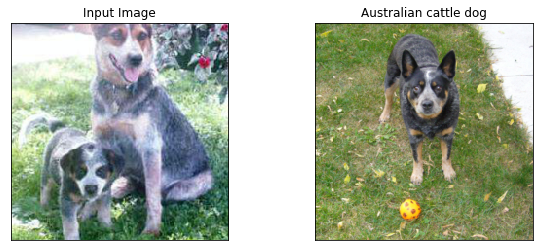

In [209]:
result = run_app(dog_files[81])


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The output is quite good compared to what I expected. For the two dog pictures, it identified my German Shepherd correctly in one picture and in the second picture it identified as a Belgian Malinois which is a very close resemblance to German Shepherd. I suspect the difference comes from how the dog is posed in each picture -- one picture standing up and one sitting down. Interestingly enough, it seems to have picked up on my shirt pattern when it classified my face as a Dalmatian and in another picture with a different shirt it classified me as a different dog breed. 

Noticing that it classified my face differently in two different pictures of myself, I think that the model is picking up on my shirt pattern -- an expected outcome of a CNN being that the shirt pattern is a simple pattern, likely detected earlier in the CNN with simpler feature detectors and this somehow closely resembles a Dalmation dog my guess is based on color (black/white) since the shirt is checkered and the Dalmatian is spotted. 

1. The first improvement I would make to the model is to train it to be more pattern-invariant so that it does not classify based on background patterns, rather just the faces or dogs alone. In one photo of my face, there is a white background and I'm wearing an orange tie, so it classified me as a dog against a snowy background with an orange collar. Whereas in the other picture of me, I'm wearing the checkered shirt and it classified me as a Dalmation. I could train the model or tweak the feature detectors to focus more on faces or dog features rather than background colors or features. 

2. The second improvement I could make to the model would be to be more pose-invariant -- it classified my German Shepherd Dog as both a GSD and a Belgian Malinois. Though the two breeds resemble one another, practically the only difference between the two input photos is how my dog is posed -- one photo standing, and one photo sitting. It could be the floppy ears on my dog making the model less likely to choose a GSD, however it was successful in one case but not in the other. I would try to continue training my model with more photos of dogs in different poses in the training set -- sitting, standing, profile, straight, etc. I'd also try to include more variations among breed features in the training set, for example, my GSD has floppy ears unlike the majority of GSD's so the model has probably never seen a German Shepherd with floppy ears. Training the model on a more diverse data set could help improve this. 

3. The third improvement I would make is to continue improving the accuracy with further training epochs. The model I used was stopped from training at about 81% accuracy without any sign of overfitting -- I stopped training in the interest of time. With further training, the model could predict a better class output from the features that it is trained to detect. This might improve the background pattern rejection performance of the model. 

Face detected! It's closest resembling breed is: 
Chinese crested


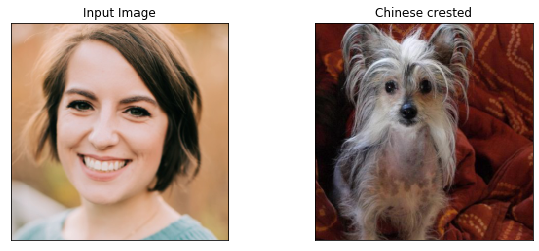

Error! No dog or human face was detected in the image!


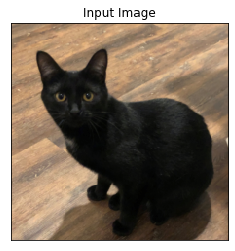

Error! No dog or human face was detected in the image!


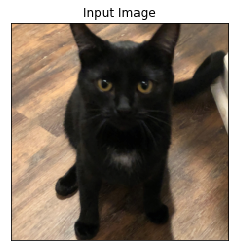

Dog detected! It's predicted breed is: 
German shepherd dog


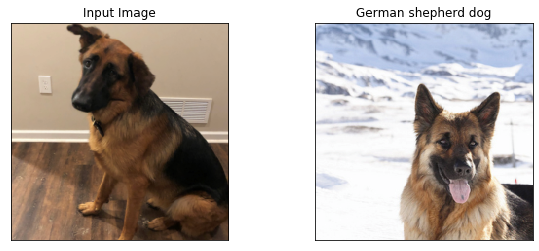

Dog detected! It's predicted breed is: 
Belgian malinois


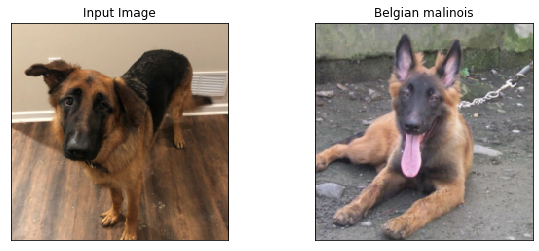

Face detected! It's closest resembling breed is: 
Italian greyhound


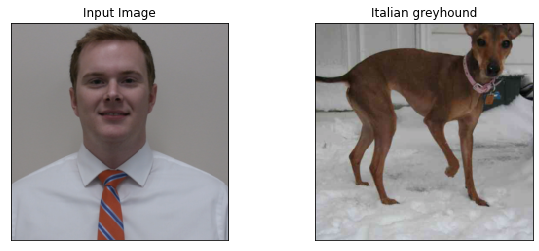

Face detected! It's closest resembling breed is: 
Dalmatian


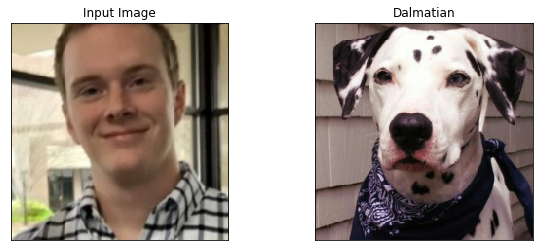

In [215]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
my_files = np.array(glob("mypictures/*"))

for file in np.hstack(my_files):
    run_app(file)